### 유방암 데이터 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


#모듈 import

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(type(cancer), dir(cancer))
#cancer의 type
#객체가 어떤 변수와 메서드를 가졌는지 출력

<class 'sklearn.utils.Bunch'> ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [3]:
cancer_data = cancer.data
cancer_label = cancer.target

print(cancer_data.shape)
#569개의 데이터가 30개의 정보를 담고 있음

(569, 30)


In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer.target_names

#targer은 악성과 양성

array(['malignant', 'benign'], dtype='<U9')

In [6]:
print(cancer.DESCR)

#데이터셋 설명

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

print(malignant.shape, benign.shape)
#malignant와 benign 시각화를 위한 분리

(212, 30) (357, 30)


Text(0.5, 1.0, 'mean radius')

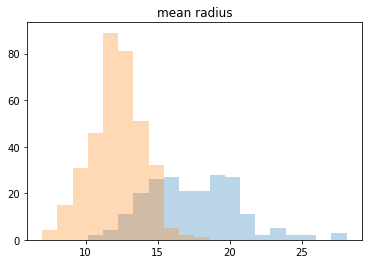

In [8]:
_, bins = np.histogram(cancer.data[:,0], bins=20)
#도수(각 구간 data의 수), 구분(도수분포 구간) = np.histogram(data, 도수분포 구간)
#도수를 언더바를 통해 무시

plt.hist(malignant[:,0],bins=bins, alpha=0.3)
plt.hist(benign[:,0], bins=bins ,alpha=0.3)
plt.title(cancer.feature_names[0])

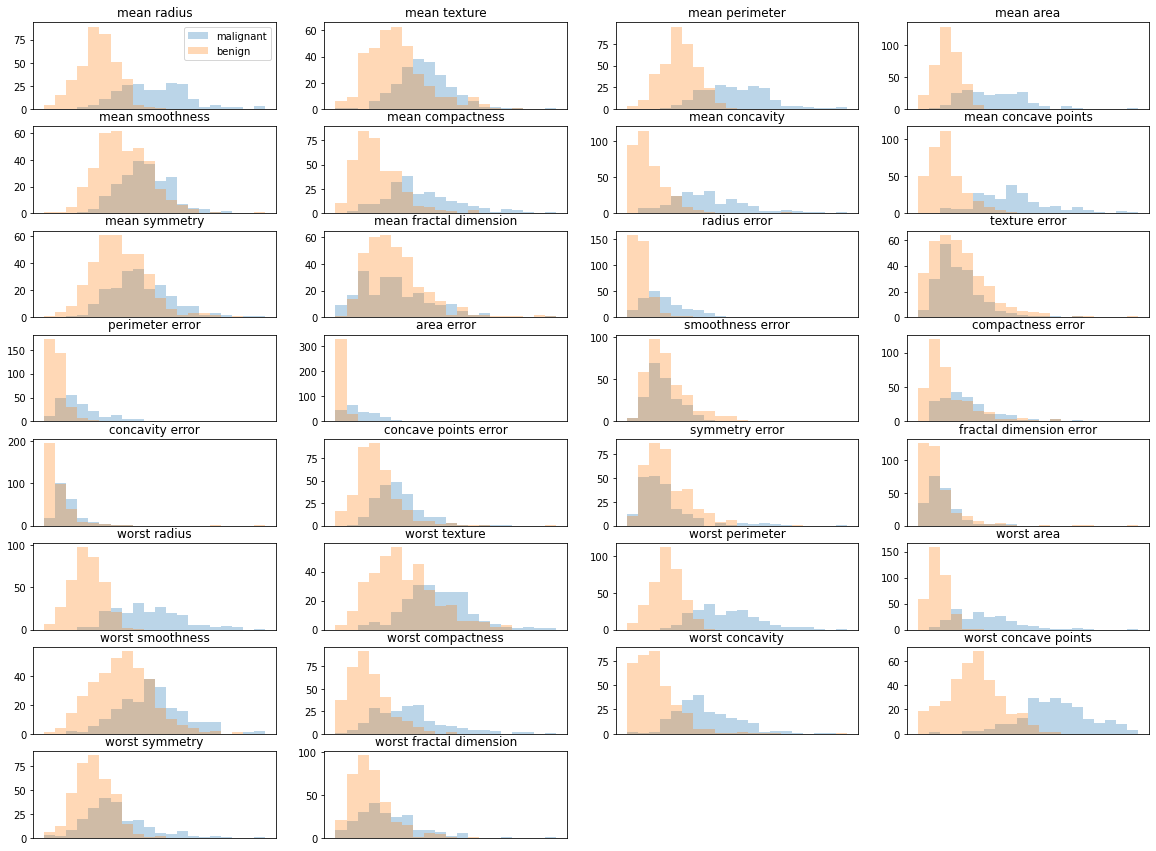

In [9]:
#각 feature별로 malignant와 bening 시각화
#위의 과정에서 column에 for문을 이용하면 된다.
plt.figure(figsize=[20,15])

for col in range(30):
    plt.subplot(8,4,col+1)
    _, bins=np.histogram(cancer.data[:,col], bins=20)

    plt.hist(malignant[:,col],bins=bins, alpha=0.3)
    plt.hist(benign[:,col], bins=bins ,alpha=0.3)
    plt.title(cancer.feature_names[col])
    if col==0: plt.legend(cancer.target_names)
    plt.xticks([])

### 데이터 준비

In [10]:
cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df
#DataFrame 자료형으로 변환

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
cancer_df["label"] = cancer.target
cancer_df
#label 컬럼 추가

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [12]:
cancer_df.info()

#Df 자료형에서 다시 데이터 파악 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7,
                                                    shuffle=True)

#훈련 데이터와 테스트 데이터 분리

In [14]:
X_train.shape, y_train.shape

((455, 30), (455,))

In [15]:
X_test.shape, y_test.shape

((114, 30), (114,))

### 다양한 데이터 모델 학습
 * Decision Tree 사용해 보기
 * Random Forest 사용해 보기
 * SVM 사용해 보기
 * SGD Classifier 사용해 보기
 * Logistic Regression 사용해 보기

#### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)

decision_tree.fit(X_train, y_train)

#의사결정 나무 모델로 학습

DecisionTreeClassifier(random_state=32)

[Text(0.6831896551724138, 0.9375, 'X[23] <= 884.55\ngini = 0.47\nsamples = 455\nvalue = [172, 283]'),
 Text(0.5043103448275862, 0.8125, 'X[27] <= 0.16\ngini = 0.167\nsamples = 304\nvalue = [28, 276]'),
 Text(0.35344827586206895, 0.6875, 'X[27] <= 0.132\ngini = 0.074\nsamples = 285\nvalue = [11, 274]'),
 Text(0.22413793103448276, 0.5625, 'X[13] <= 38.605\ngini = 0.03\nsamples = 259\nvalue = [4, 255]'),
 Text(0.13793103448275862, 0.4375, 'X[14] <= 0.003\ngini = 0.016\nsamples = 249\nvalue = [2, 247]'),
 Text(0.06896551724137931, 0.3125, 'X[19] <= 0.001\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.034482758620689655, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10344827586206896, 0.1875, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.20689655172413793, 0.3125, 'X[21] <= 33.27\ngini = 0.008\nsamples = 243\nvalue = [1, 242]'),
 Text(0.1724137931034483, 0.1875, 'gini = 0.0\nsamples = 226\nvalue = [0, 226]'),
 Text(0.2413793103448276, 0.1875, 'X[21] <= 33.56\ngini

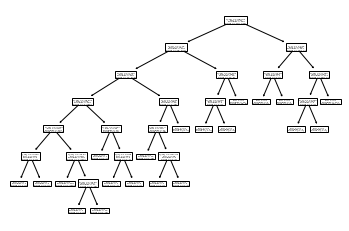

In [17]:
from sklearn import tree
tree.plot_tree(decision_tree)

#시각화

In [18]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

#테스트 데이터 예측 및 레포트

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [19]:
from sklearn.metrics import mean_squared_error
from  sklearn.metrics import recall_score

print(mean_squared_error(y_test, y_pred))
print(recall_score(y_test,y_pred))

#MSE, Recall 출력
#유방암 판정에서는양성을 음성으로 진단하는 2종 오류가 치명적. Recall이 중요(TP/(TP+FN))

0.08771929824561403
0.9594594594594594


#### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=255)

random_forest.fit(X_train, y_train)

#랜덤 포레스트 모델로 학습

RandomForestClassifier(random_state=255)

In [21]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

#테스트 데이터 예측 및 레포트

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.96      1.00      0.98        74

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [22]:
print(mean_squared_error(y_test, y_pred))
print(recall_score(y_test,y_pred))

#MSE, Recall 출력

0.02631578947368421
1.0


#### SVM

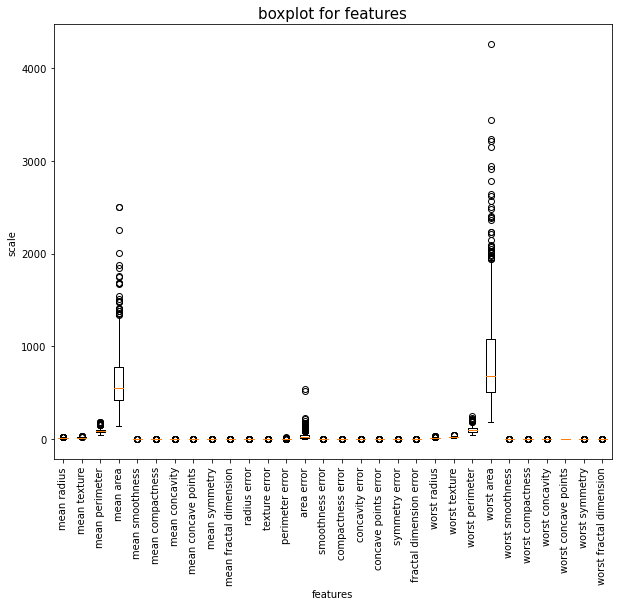

In [23]:
fig=plt.figure(figsize=[10,8])
plt.title('boxplot for features',fontsize=15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1,cancer.feature_names,rotation=90)
plt.xlabel('features')
plt.ylabel('scale')
print('')

#데이터의 스케일 확인
#SVM은 Scale에 민감하다. => normalization(정규화)가 필요

In [24]:
# from sklearn.preprocessing import Normalizer

# norm = Normalizer()

# X_train_scaled = norm.fit_transform(X_train)
# X_test_scaled = norm.transform(X_test)

# # SVM이 더 잘 작동할 수 있도록 Scaler 이용

In [25]:
#pd.DataFrame(X_train_scaled).describe()

# Normalizer 확인

In [26]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

train_score = svc_model.score(X_train, y_train)
test_score = svc_model.score(X_test, y_test)
display(train_score, test_score)

0.9142857142857143

0.9035087719298246

In [27]:
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

#테스트 데이터 예측 및 레포트

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



In [28]:
print(mean_squared_error(y_test, y_pred))
print(recall_score(y_test,y_pred))

#MSE, Recall 출력

0.09649122807017543
1.0


#### SGD Classifier

In [29]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

SGDClassifier()

In [30]:
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

#테스트 데이터 예측 및 레포트

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        40
           1       0.79      1.00      0.88        74

    accuracy                           0.82       114
   macro avg       0.89      0.75      0.77       114
weighted avg       0.86      0.82      0.81       114



In [31]:
print(mean_squared_error(y_test, y_pred))
print(recall_score(y_test,y_pred))

#MSE, Recall 출력

0.17543859649122806
1.0


#### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [33]:
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

#테스트 데이터 예측 및 레포트

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [34]:
print(mean_squared_error(y_test, y_pred))
print(recall_score(y_test,y_pred))

#MSE, Recall 출력

0.05263157894736842
1.0
